<a href="https://colab.research.google.com/github/damitkumar11/Jobs-and-Salaries-in-Data-Science/blob/main/Data_Job_Salaries_in_the_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'jobs-in-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4213326%2F7279972%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240128%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240128T145347Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db1fdcab2518d6a23d7b14c80c36e714b381e055426353e806bbf72cd0f20f58312bb3656d5849a3a03422fd368cee23fffab243c8509eba0304d879b0401e8f1c81ad4e76944076d2b7dabfa29f91adc04fe6b7bb67659b5dce158e3d7a54857e26f2496a62f1e673d59cd5e2e66b057b70a85edf63c3e546844e60a2b693824bc0bf1bf0a292a1facb2dfd9384b53d498d7fddd2b6e05a47e2a29c845e10cb57da9ca939b6f105b43258933eea6789bf2b359e2465882903f34ad251fbc2e8ba1e8ac6087f5f25560c841d5a8b12a89488214742080522724e4a805ffbd65f3b46ed40aed710991b0ae47dfa21ee2dfb23a81ee35dcf73e07fd60d07ba6d410'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 77972 bytes downloaded
Downloaded and uncompressed: jobs-in-data
Data source import complete.


<a id="0"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">NORTH AMERICAN SALARY TRENDS IN DATA RELATED CAREERS</p>

<p style="text-align:justify; ">
In today's rapidly evolving digital landscape, the importance of data-related jobs has become paramount. As businesses and organizations grapple with an ever-increasing volume of information, professionals adept at extracting insights from data play a pivotal role in shaping strategic decisions. Whether it's analyzing consumer behavior, optimizing operations, or predicting market trends, data-related roles such as data scientists, analysts, and engineers contribute significantly to driving innovation and fostering a competitive edge. These professionals not only transform raw data into actionable intelligence but also bridge the gap between raw information and informed decision-making.

As we delve into this project, we will explore the dynamic realm of data-related jobs and their current salaries and popularity within the United States.
</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#121212;margin:0;color:#ffffff;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents</p>   
  
    
|No  | Contents                                                        |No  | Contents                        |
|:---| :---                                                            |:---| :----                           |
|0   | [<font color="#bc4749">Introduction </font>](#0)                |4  | [<font color="#bc4749"> Recent 2 YR Trends</font>](#4)      |
|1   | [<font color="#bc4749">Data Collection & Cleaning </font>](#1)  |5  | [<font color="#bc4749"> Summary of Findings</font>](#5)     |  
|2   | [<font color="#bc4749">Data Analysis </font>](#2)               |6  | [<font color="#bc4749"> Interactive Summary</font>](#6)     |
|3   | [<font color="#bc4749">Statistical Analysis </font>](#3)        |7  | [<font color="#bc4749"> Thank You</font>](#7)               |         


<a id="1"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">DATA COLLECTION AND CLEANING</p>

In [2]:
# Import required python packages
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# print('Matplotlib version: ', mpl.__version__)
# print(plt.style.available)
mpl.style.use(['tableau-colorblind10'])
sns.set_theme(style="ticks", palette="colorblind")

In [3]:
# Import jobs data
df = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
df = pd.DataFrame(df, dtype=object)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   object
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   object
 5   salary_in_usd       9355 non-null   object
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: object(12)
memory usage: 877.2+ KB


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [4]:
# Looking at all unique data in the table
print(f"\t\t\tUNIQUE RECORDS IN DATA TABLE")
for i in df.columns:
    print('--'* 38)
    print(f"{i.upper()} (distinct: {'{:,}'.format(df[i].nunique())})")
    print(df[i].unique())

			UNIQUE RECORDS IN DATA TABLE
----------------------------------------------------------------------------
WORK_YEAR (distinct: 4)
[2023 2022 2020 2021]
----------------------------------------------------------------------------
JOB_TITLE (distinct: 125)
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' '

In [5]:
# Collecting the number of records obtained from each location and their weight on the overall data
df_loc_counts = pd.DataFrame(df[['company_location', 'employee_residence']].value_counts().reset_index(name='count'))
df_loc_counts['%_dataset_total'] = df_loc_counts['count'].apply(lambda x: round((x/df_loc_counts['count'].sum())*100,2))
print(f"\033[1;4m{df_loc_counts['%_dataset_total'].values[0]}% of the data was obtained from US based companies and employees\033[0m")

# Exploring United States related data in the dataset
req = 'United States'
df_loc_counts.reset_index().query("company_location==@req or employee_residence==@req").sort_values(
    by=['company_location', 'employee_residence'], ascending=[True, False]).reset_index(drop=True)

86.37% of the data was obtained from US based companies and employees


,index,company_location,employee_residence,count,%_dataset_total
0,118,Australia,United States,1,0.01
1,42,Canada,United States,2,0.02
2,98,France,United States,1,0.01
3,153,Germany,United States,1,0.01
4,144,Japan,United States,1,0.01
5,154,United States,Vietnam,1,0.01
6,52,United States,Uzbekistan,2,0.02
7,0,United States,United States,8080,86.37
8,67,United States,Uganda,1,0.01
9,63,United States,Turkey,1,0.01


In [6]:
# filter company and employee locations to United States only
US_data = df[df['company_location'] == req]
US_data = US_data[US_data['employee_residence'] == req]

#remove 'company_size' and other repetitive columns
US_data.drop(columns={'company_size','salary_currency','salary_in_usd'
                      , 'employee_residence', 'company_location'}, inplace=True)

# changed name of column for clarity, year - the year in which the data was collected
US_data.rename(columns={'work_year':'year'}, inplace=True)

# changed the data type of salary column from object to integer
US_data['salary'] = US_data['salary'].astype(int)

US_data.info()
US_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8080 entries, 1 to 9354
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              8080 non-null   object
 1   job_title         8080 non-null   object
 2   job_category      8080 non-null   object
 3   salary            8080 non-null   int64 
 4   experience_level  8080 non-null   object
 5   employment_type   8080 non-null   object
 6   work_setting      8080 non-null   object
dtypes: int64(1), object(6)
memory usage: 505.0+ KB


,year,job_title,job_category,salary,experience_level,employment_type,work_setting
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person
3,2023,Data Scientist,Data Science and Research,212000,Senior,Full-time,In-person
4,2023,Data Scientist,Data Science and Research,93300,Senior,Full-time,In-person
5,2023,Data Scientist,Data Science and Research,130000,Senior,Full-time,Remote
...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,165000,Senior,Full-time,Remote
9351,2020,Data Scientist,Data Science and Research,412000,Senior,Full-time,Remote
9352,2021,Principal Data Scientist,Data Science and Research,151000,Mid-level,Full-time,Remote
9353,2020,Data Scientist,Data Science and Research,105000,Entry-level,Full-time,Remote


<a id="2"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EXPLORATORY DATA ANALYSIS</p>

In [7]:
# Getting a count of the distinct records in each column
print(f"\033[1;4mDistinct Records in Dataset\033[0m")
US_data.nunique()

Distinct Records in Dataset


year                   4
job_title            101
job_category          10
salary              1360
experience_level       4
employment_type        3
work_setting           3
dtype: int64

In [8]:
# Collecting the number of records in each available year
US_rec_counts = pd.DataFrame(US_data['year'].value_counts())
US_rec_counts["% of dataset"] = round((US_rec_counts['year']/US_rec_counts.values.sum())*100,2)

#calculate the % of data obtained in most recent years
k=round(US_rec_counts["% of dataset"].values[0] + US_rec_counts["% of dataset"].values[1], 2)
print(f"\033[1;4m{k}% of the data was obtained in the past 2 years\033[0m")

US_rec_counts

98.57% of the data was obtained in the past 2 years


,year,% of dataset
2023,6642,82.20
2022,1323,16.37
2021,87,1.08
2020,28,0.35


In [9]:
# Collecting count of job categories surveyed by year
jcat2 = US_data.groupby(['year'])['job_category'].value_counts().unstack().fillna(0).astype(int)
jcat2['Total'] = jcat2.sum(axis=1)
jcat2

job_category,BI and Visualization,Cloud and Database,Data Analysis,Data Architecture and Modeling,Data Engineering,Data Management and Strategy,Data Quality and Operations,Data Science and Research,Leadership and Management,Machine Learning and AI,Total
year,,,,,,,,,,,
2020,0,0,8,0,4,0,0,13,0,3,28
2021,0,0,16,4,22,1,0,27,5,12,87
2022,4,2,239,44,417,10,12,406,65,124,1323
2023,284,3,975,189,1526,44,38,2179,369,1035,6642


In [10]:
#  Collecting count of job categories surveyed by year and work setting
jcat2_1 = US_data.groupby(['year', 'work_setting'])['job_category'].value_counts().unstack().fillna(0).astype(int)
jcat2_1['Total']=jcat2_1.sum(axis=1)

jcat2_1

job_category       BI and Visualization  Cloud and Database  Data Analysis  \
year work_setting                                                            
2020 Hybrid                           0                   0              0   
     In-person                        0                   0              2   
     Remote                           0                   0              6   
2021 Hybrid                           0                   0              1   
     In-person                        0                   0              2   
     Remote                           0                   0             13   
2022 Hybrid                           1                   0              4   
     In-person                        0                   0            115   
     Remote                           3                   2            120   
2023 Hybrid                           0                   0              4   
     In-person                      210                   0            552   
     Remote                          74                   3            419   

job_category       Data Architecture and Modeling  Data Engineering  \
year work_setting                                                     
2020 Hybrid                                     0                 0   
     In-person                                  0                 0   
     Remote                                     0                 4   
2021 Hybrid                                     1                 0   
     In-person                                  0                 5   
     Remote                                     3                17   
2022 Hybrid                                     0                 0   
     In-person                                 10               222   
     Remote                                    34               195   
2023 Hybrid                                     0                 0   
     In-person                                102              1079   
     Remote                                    87               447   

job_category       Data Management and Strategy  Data Quality and Operations  \
year work_setting                                                              
2020 Hybrid                                   0                            0   
     In-person                                0                            0   
     Remote                                   0                            0   
2021 Hybrid                                   0                            0   
     In-person                                0                            0   
     Remote                                   1                            0   
2022 Hybrid                                   0                            0   
     In-person                                6                            4   
     Remote                                   4                            8   
2023 Hybrid                                   0                            0   
     In-person                               26                           28   
     Remote                                  18                           10   

job_category       Data Science and Research  Leadership and Management  \
year work_setting                                                         
2020 Hybrid                                2                          0   
     In-person                             1                          0   
     Remote                               10                          0   
2021 Hybrid                                5                          0   
     In-person                             7                          1   
     Remote                               15                          4   
2022 Hybrid                                5                          1   
     In-person                           164                         24   
     Remote                              

In [11]:
#  Collecting count of job categories surveyed by year, work setting and experience level
jcat2_2 = US_data.groupby(['year', 'work_setting', 'experience_level'])['job_category'
                        ].value_counts().unstack().fillna(0).astype(int)
jcat2_2['Total']=jcat2_2.sum(axis=1)

jcat2_2

job_category                        BI and Visualization  Cloud and Database  \
year work_setting experience_level                                             
2020 Hybrid       Entry-level                          0                   0   
                  Senior                               0                   0   
     In-person    Mid-level                            0                   0   
     Remote       Entry-level                          0                   0   
                  Executive                            0                   0   
                  Mid-level                            0                   0   
                  Senior                               0                   0   
2021 Hybrid       Entry-level                          0                   0   
                  Mid-level                            0                   0   
                  Senior                               0                   0   
     In-person    Entry-level                          0                   0   
                  Executive                            0                   0   
                  Mid-level                            0                   0   
                  Senior                               0                   0   
     Remote       Entry-level                          0                   0   
                  Executive                            0                   0   
                  Mid-level                            0                   0   
                  Senior                               0                   0   
2022 Hybrid       Entry-level                          1                   0   
                  Mid-level                            0                   0   
                  Senior                               0                   0   
     In-person    Entry-level                          0                   0   
                  Executive                            0                   0   
                  Mid-level                            0                   0   
                  Senior                               0                   0   
     Remote       Entry-level                          0                   0   
                  Executive                            0                   0   
                  Mid-level                            0                   0   
                  Senior                               3                   2   
2023 Hybrid       Entry-level                          0                   0   
                  Mid-level                            0                   0   
     In-person    Entry-level                          6                   0   
                  Executive                            6                   0   
                  Mid-level                           32                   0   
                  Senior                             166                   0   
     Remote       Entry-level                          0                   0   
                  Executive                            0                   0   
                  Mid-level                           14                   0   
                  Senior                              60                   3   

job_category                        Data Analysis  \
year work_setting experience_level                  
2020 Hybrid       Entry-level                   0   
                  Senior                        0   
     In-person    Mid-level                     2   
     Remote       Entry-level                   3   
                  Executive                     0   
                  Mid-level                     3   
                  Senior                        0   
2021 Hybrid       Entry-level                   1   
                  Mid-level                     0   
                  Senior                        0   
     In-person    Entry-level                   0   
                  Executive   

In [12]:
# Flattened Jcat2_2 table to extract records
flattened_table = pd.DataFrame(jcat2_2.to_records())
flattened_table.columns = ['year', 'work_setting', 'experience_level'] + list(jcat2_2.columns)
flattened_table['year'] = flattened_table['year'].astype(object)

# Create chart
fig = px.sunburst(flattened_table, path=['year', 'work_setting', 'experience_level']
                  , color='year', values=jcat2_2['Total']
                  , color_discrete_map={2020:'176d9c', 2021:'c38820', 2022:'158b6a', 2023:'ba611b'}
                  , title='Sunburst Chart Showing Count of United States Jobs Surveyed by Year, Work Setting and Experience Level')
fig.update_layout(title={'y':.9,'x':0.5,'xanchor':'center','yanchor':'top'})

fig.show()

<a id="3"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">STATISTICAL ANALYSIS</p>

In [13]:
# Define global variable to change the order of 'experience level' column
exp_order='Entry-level', 'Mid-level', 'Senior', 'Executive'

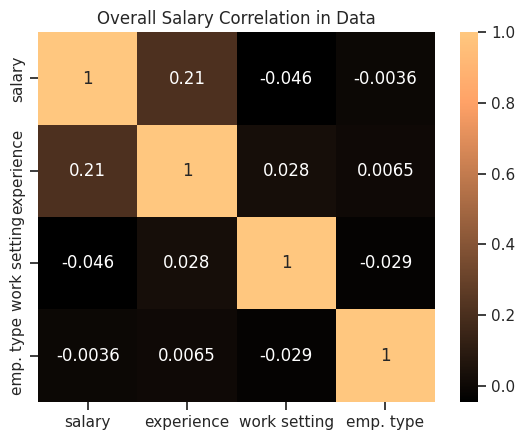

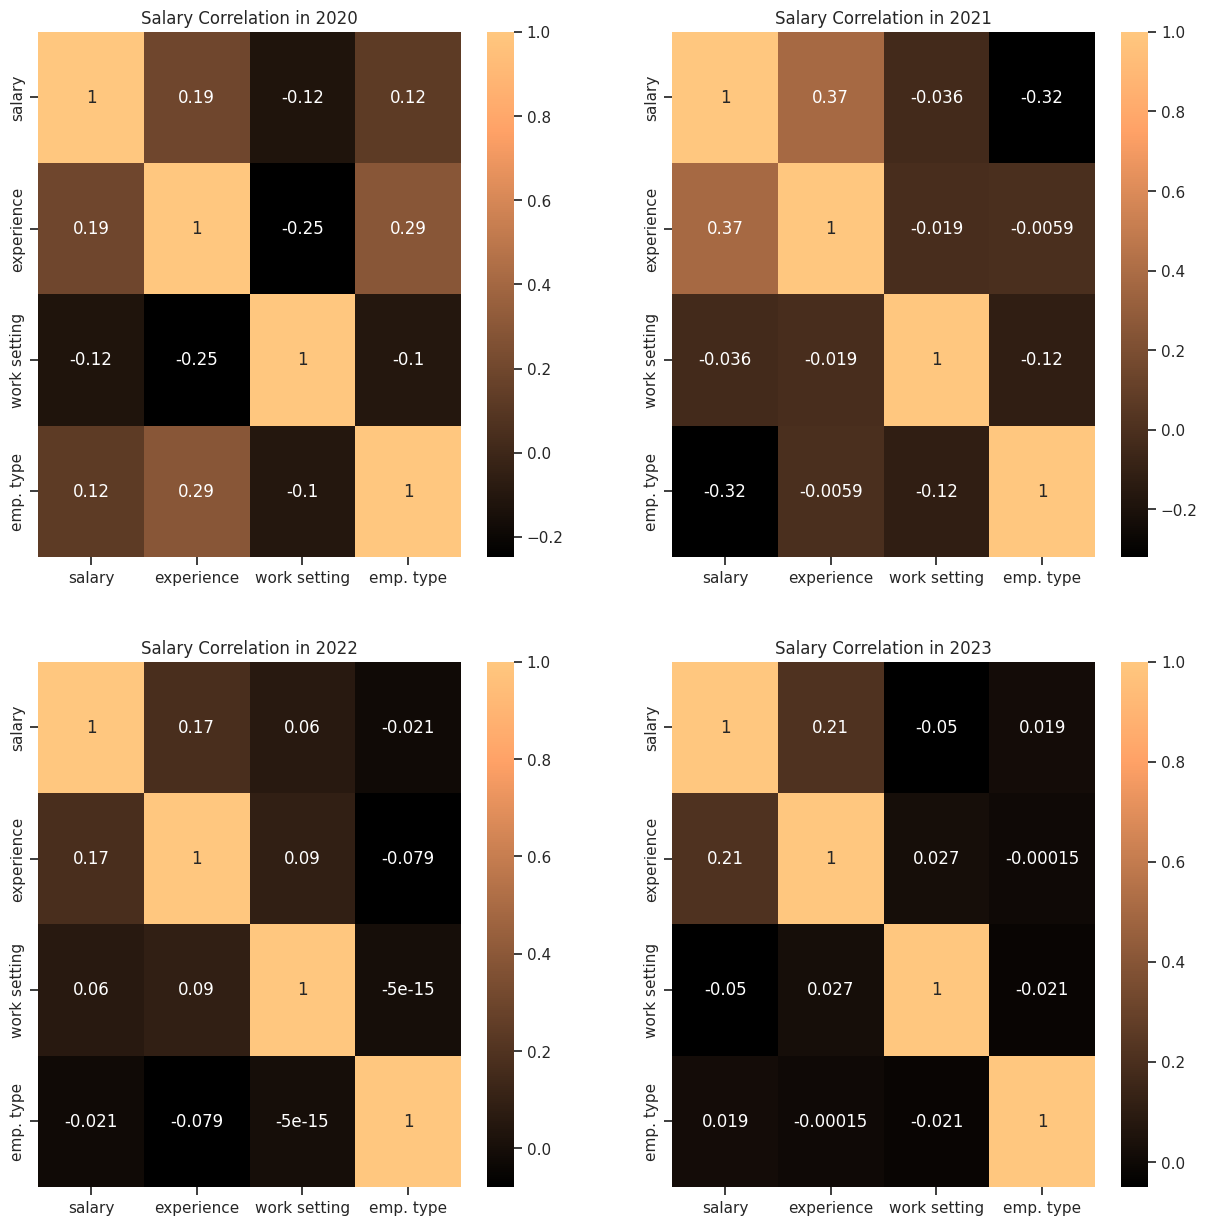

In [14]:
# Getting statistical averages for each year's data
# Encode data for correlation
label_encoder = LabelEncoder()
US_data["experience"] = label_encoder.fit_transform(US_data['experience_level'])
US_data["work setting"] = label_encoder.fit_transform(US_data['work_setting'])
US_data["emp. type"] = label_encoder.fit_transform(US_data['employment_type'])

# overall average
corr_matrix = US_data[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Overall Salary Correlation in Data')
sns.heatmap(corr_matrix, annot = True, cmap ='copper')
plt.show()

# Averages by year
plt.figure(figsize=(15,15))

plt.subplot(221)
year1 = US_data[US_data['year']==US_data['year'].min()]
corr_matrix1 = year1[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Salary Correlation in ' + str(int(year1['year'].unique())))
sns.heatmap(corr_matrix1, annot = True, cmap ='copper')

plt.subplot(222)
year2 = US_data[US_data['year']==US_data['year'].min()+1]
corr_matrix2 = year2[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Salary Correlation in ' + str(int(year2['year'].unique())))
sns.heatmap(corr_matrix2, annot = True, cmap ='copper')

plt.subplot(223)
year3 = US_data[US_data['year']==US_data['year'].min()+2]
corr_matrix3 = year3[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Salary Correlation in ' + str(int(year3['year'].unique())))
sns.heatmap(corr_matrix3, annot = True, cmap ='copper')

plt.subplot(224)
year4 = US_data[US_data['year']==US_data['year'].min()+3]
corr_matrix4 = year4[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Salary Correlation in ' + str(int(year4['year'].unique())))
sns.heatmap(corr_matrix4, annot = True, cmap ='copper')

plt.show()

In [15]:
# statistical averages for total dataset
stats = US_data.describe(include='all')
print(f'\t\t\t\t\t\t\toverall statistical averages'.upper())
display(stats)
print(f'\t\t\toverall correlation'.upper())
corr_matrix

							OVERALL STATISTICAL AVERAGES


,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,8080.0,8080,8080,8080.000000,8080,8080,8080,8080.000000,8080.000000,8080.000000
unique,4.0,101,10,NaN,4,3,3,NaN,NaN,NaN
top,2023.0,Data Engineer,Data Science and Research,NaN,Senior,Full-time,In-person,NaN,NaN,NaN
freq,6642.0,1933,2625,NaN,6138,8067,5169,NaN,NaN,NaN
mean,NaN,NaN,NaN,158598.940223,NaN,NaN,NaN,2.648515,1.350866,0.999134
std,NaN,NaN,NaN,59228.911481,NaN,NaN,NaN,0.728853,0.487026,0.040104
min,NaN,NaN,NaN,24000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,117875.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
50%,NaN,NaN,NaN,150000.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
75%,NaN,NaN,NaN,192000.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000


			OVERALL CORRELATION


,salary,experience,work setting,emp. type
salary,1.000000,0.209958,-0.045917,-0.003590
experience,0.209958,1.000000,0.027708,0.006520
work setting,-0.045917,0.027708,1.000000,-0.028796
emp. type,-0.003590,0.006520,-0.028796,1.000000


In [16]:
# statistical averages for first year of data collected
y1_stats = year1.describe(include='all')
print(f'\t\t\t\t\t\t\t {int(y1_stats["year"][2])} statistical averages'.upper())
display(y1_stats)
print(f'\t\t\t{int(y1_stats["year"][2])} correlation'.upper())
corr_matrix1

							 2020 STATISTICAL AVERAGES


,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,28.0,28,28,28.000000,28,28,28,28.000000,28.000000,28.000000
unique,1.0,15,4,NaN,4,2,3,NaN,NaN,NaN
top,2020.0,Data Scientist,Data Science and Research,NaN,Mid-level,Full-time,Remote,NaN,NaN,NaN
freq,28.0,6,13,NaN,12,27,21,NaN,NaN,NaN
mean,NaN,NaN,NaN,160555.357143,NaN,NaN,NaN,1.678571,1.607143,0.964286
std,NaN,NaN,NaN,99650.709740,NaN,NaN,NaN,1.123934,0.737327,0.188982
min,NaN,NaN,NaN,70000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,99500.000000,NaN,NaN,NaN,0.750000,1.750000,1.000000
50%,NaN,NaN,NaN,119000.000000,NaN,NaN,NaN,2.000000,2.000000,1.000000
75%,NaN,NaN,NaN,188500.000000,NaN,NaN,NaN,2.250000,2.000000,1.000000


			2020 CORRELATION


,salary,experience,work setting,emp. type
salary,1.000000,0.192524,-0.123444,0.119093
experience,0.192524,1.000000,-0.247405,0.292694
work setting,-0.123444,-0.247405,1.000000,-0.104421
emp. type,0.119093,0.292694,-0.104421,1.000000


In [17]:
# statistical averages for second year of data collected
y2_stats = year2.describe(include='all')
print(f'\t\t\t\t\t\t\t{int(y2_stats["year"][2])} statistical averages'.upper())
display(y2_stats)
print(f'\t\t\t{int(y2_stats["year"][2])} correlation'.upper())
corr_matrix2

							2021 STATISTICAL AVERAGES


,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,87.0,87,87,87.000000,87,87,87,87.000000,87.000000,87.000000
unique,1.0,28,7,NaN,4,2,3,NaN,NaN,NaN
top,2021.0,Data Engineer,Data Science and Research,NaN,Senior,Full-time,Remote,NaN,NaN,NaN
freq,87.0,19,27,NaN,34,84,60,NaN,NaN,NaN
mean,NaN,NaN,NaN,147206.034483,NaN,NaN,NaN,1.965517,1.551724,0.965517
std,NaN,NaN,NaN,69393.337087,NaN,NaN,NaN,1.104413,0.727510,0.183523
min,NaN,NaN,NaN,50000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,96575.000000,NaN,NaN,NaN,2.000000,1.000000,1.000000
50%,NaN,NaN,NaN,140000.000000,NaN,NaN,NaN,2.000000,2.000000,1.000000
75%,NaN,NaN,NaN,182500.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000


			2021 CORRELATION


,salary,experience,work setting,emp. type
salary,1.000000,0.372423,-0.035906,-0.319002
experience,0.372423,1.000000,-0.019462,-0.005935
work setting,-0.035906,-0.019462,1.000000,-0.117122
emp. type,-0.319002,-0.005935,-0.117122,1.000000


In [18]:
# statistical averages for third year of data collected
y3_stats = year3.describe(include='all')
print(f'\t\t\t\t\t\t\t{int(y3_stats["year"][2])} statistical averages'.upper())
display(y3_stats)
print(f'\t\t\t{int(y3_stats["year"][2])} correlation'.upper())
corr_matrix3

							2022 STATISTICAL AVERAGES


,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,1323.0,1323,1323,1323.000000,1323,1323,1323,1323.000000,1323.000000,1323.000000
unique,1.0,47,10,NaN,4,3,3,NaN,NaN,NaN
top,2022.0,Data Engineer,Data Engineering,NaN,Senior,Full-time,Remote,NaN,NaN,NaN
freq,1323.0,409,417,NaN,1027,1321,711,NaN,NaN,NaN
mean,NaN,NaN,NaN,148294.352230,NaN,NaN,NaN,2.660620,1.526833,1.000000
std,NaN,NaN,NaN,50922.812594,NaN,NaN,NaN,0.738307,0.520239,0.038895
min,NaN,NaN,NaN,24000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,114450.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
50%,NaN,NaN,NaN,142127.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000
75%,NaN,NaN,NaN,180000.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000


			2022 CORRELATION


,salary,experience,work setting,emp. type
salary,1.000000,0.172163,5.963068e-02,-2.126455e-02
experience,0.172163,1.000000,8.970115e-02,-7.902302e-02
work setting,0.059631,0.089701,1.000000e+00,-5.008090e-15
emp. type,-0.021265,-0.079023,-5.008090e-15,1.000000e+00


In [19]:
# statistical averages for fourth year of data collected
y4_stats = year4.describe(include='all')
print(f'\t\t\t\t\t\t\t{int(y4_stats["year"][2])} statistical averages'.upper())
display(y4_stats)
print(f'\t\t\t{int(y4_stats["year"][2])} correlation'.upper())
corr_matrix4

							2023 STATISTICAL AVERAGES


,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,6642.0,6642,6642,6642.000000,6642,6642,6642,6642.000000,6642.000000,6642.000000
unique,1.0,79,10,NaN,4,3,3,NaN,NaN,NaN
top,2023.0,Data Engineer,Data Science and Research,NaN,Senior,Full-time,In-person,NaN,NaN,NaN
freq,6642.0,1502,2179,NaN,5070,6635,4553,NaN,NaN,NaN
mean,NaN,NaN,NaN,160792.462210,NaN,NaN,NaN,2.659139,1.312105,0.999548
std,NaN,NaN,NaN,60175.222882,NaN,NaN,NaN,0.711754,0.465980,0.032463
min,NaN,NaN,NaN,24000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,120000.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
50%,NaN,NaN,NaN,151600.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
75%,NaN,NaN,NaN,198200.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000


			2023 CORRELATION


,salary,experience,work setting,emp. type
salary,1.000000,0.214525,-0.049619,0.019269
experience,0.214525,1.000000,0.027062,-0.000147
work setting,-0.049619,0.027062,1.000000,-0.020542
emp. type,0.019269,-0.000147,-0.020542,1.000000


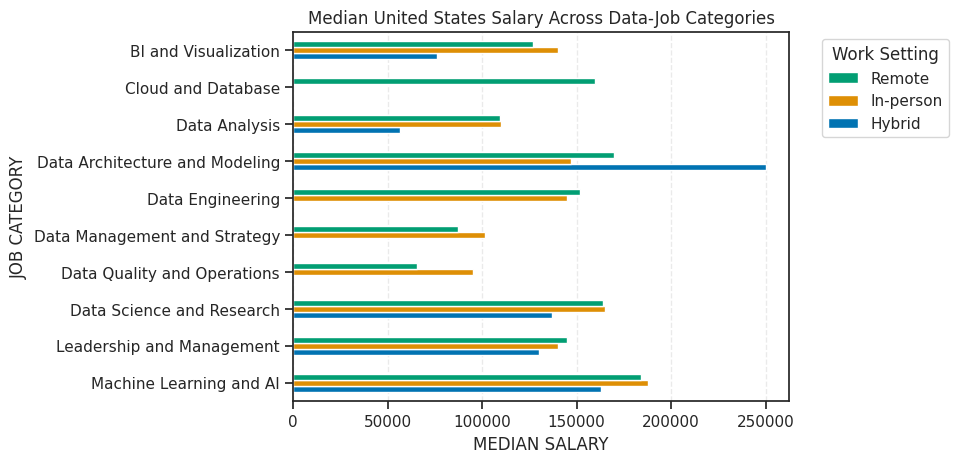

In [20]:
# Fetching the median salary by job category and work setting
jcat = US_data.groupby(['job_category', 'work_setting'])['salary'].median().unstack().fillna(
    0).sort_index(ascending=False)

# creating horizantal bar chart
jcat.plot.barh(title='Median United States Salary across Data-Job Categories'.title(), legend=True)
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left', reverse=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlabel('MEDIAN SALARY')
plt.ylabel('JOB CATEGORY')

plt.show()

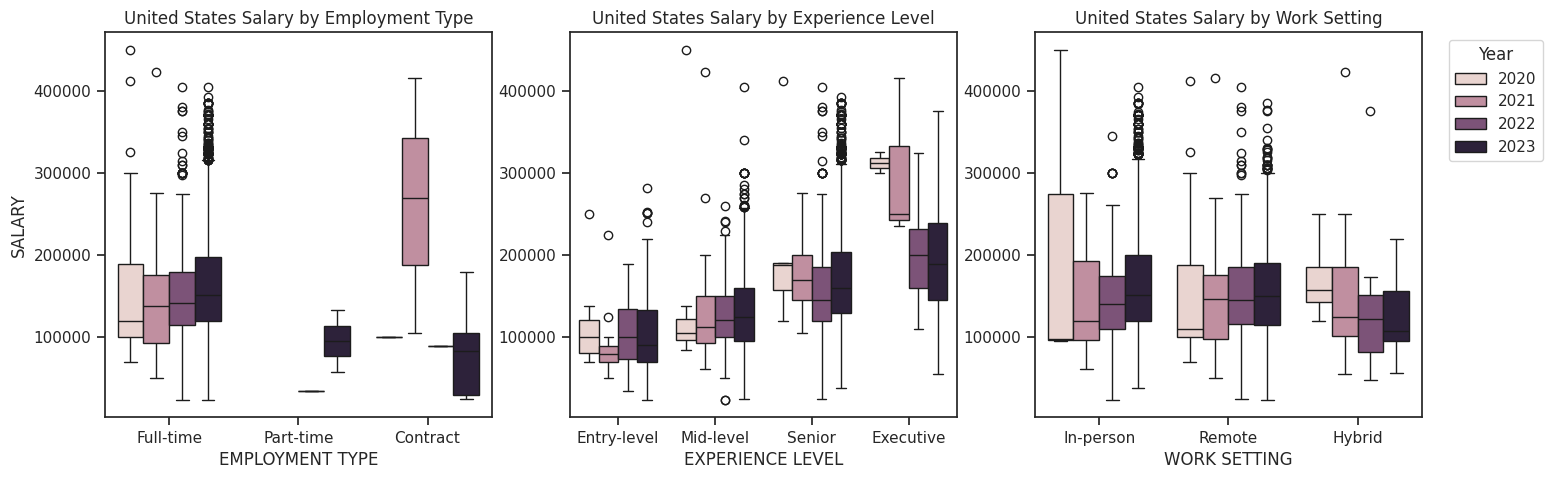

In [21]:
# Fetching salary data by statistically significant categories
plt.figure(figsize=(17,5))

# creating subplot for employment_type to salary
plt.subplot(131)
sns.boxplot(data=US_data, x='employment_type', y='salary',hue='year')
plt.xlabel('EMPLOYMENT TYPE')
plt.ylabel('SALARY')
plt.legend().remove()
plt.title('United States Salary by Employment Type')

# creating subplot for experience_level to salary
plt.subplot(132)
sns.boxplot(data=US_data, x='experience_level', y='salary', hue='year'
            , order=exp_order)
plt.legend().remove()
plt.ylabel("")
plt.xlabel('EXPERIENCE LEVEL')
plt.title('United States Salary by Experience Level')

# creating subplot for work_setting to salary
plt.subplot(133)
sns.boxplot(data=US_data, x='work_setting', y='salary', hue='year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("")
plt.xlabel('WORK SETTING')
plt.title('United States Salary by Work Setting')

plt.show()

<a id="4"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Most Recent Salary Data</p>

> Since experience level stands out as the primary determinant of salary and a majority of respondents identify as full-time employees, our focus shifts to examining the salary breakdown for full-time employees based on experience for the most recent two years.

NB. Approximately 99% of the data pertains to the past two years. Restricting our trend analysis to this timeframe ensures more meaningful results.

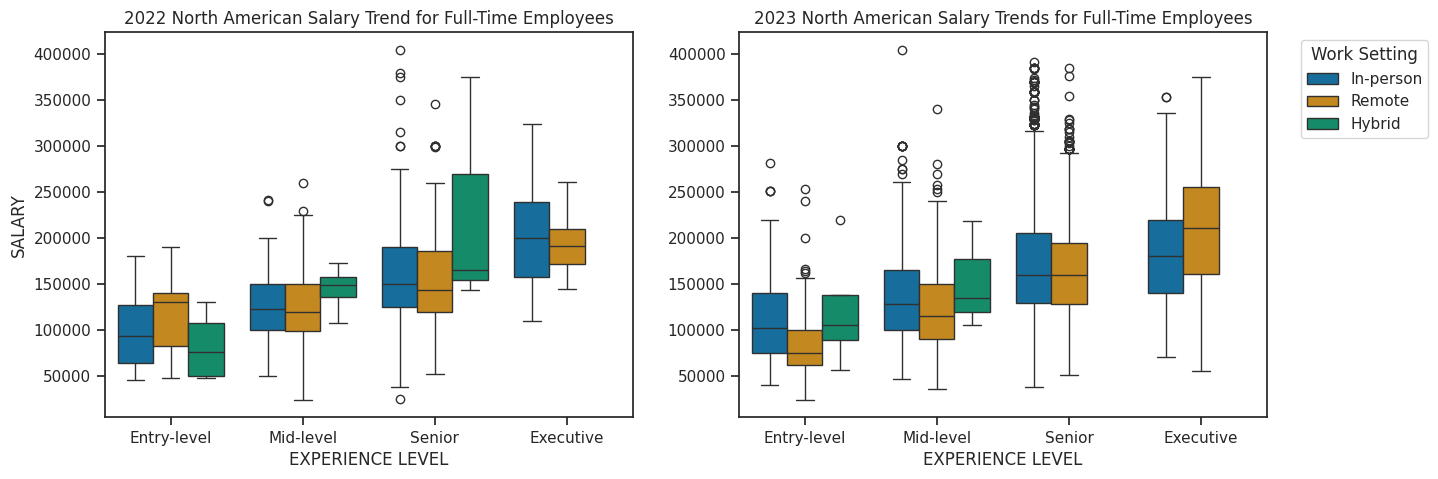

In [22]:
# tabulating the data for the most recent years
this_year = US_data['year'].max()
last_year = US_data['year'].max()-1
emp_type = 'Full-time'

plt.figure(figsize=(15,5))
plt.subplot(121)

# Getting the penultimate year data
lyear = US_data.query('year == @last_year and employment_type == @emp_type')
sns.boxplot(data=lyear, x='experience_level', y='salary',hue='work_setting', order=exp_order)
plt.xlabel('EXPERIENCE LEVEL')
plt.ylabel('SALARY')
plt.legend().remove()
plt.title(str(last_year) + ' North American Salary Trend for Full-Time Employees')

plt.subplot(122)
# Getting the most recent year data
present = US_data.query('year == @this_year and employment_type == @emp_type')
sns.boxplot(data=present, x='experience_level', y='salary',hue='work_setting', order=exp_order)
plt.xlabel('EXPERIENCE LEVEL')
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(str(this_year) + ' North American Salary Trends for Full-Time Employees')
plt.ylabel('')

plt.show()

In [23]:
# getting the past 2 years of data to make % comparisons
present_data = present.groupby(['employment_type', 'experience_level', 'work_setting'])['salary'].median()
lyear_data = lyear.groupby(['employment_type','experience_level', 'work_setting'])['salary'].median()
recent_data = pd.merge(lyear_data, present_data, on=['employment_type', 'experience_level', 'work_setting']
                       , suffixes=('_lastyear', '_present'))

# Calculate percentage change for the past 2 years
recent_data['%_change'] = ((recent_data['salary_present'] - recent_data['salary_lastyear'])
                           / recent_data['salary_lastyear']) * 100
recent_data

salary_lastyear  \
employment_type experience_level work_setting                    
Full-time       Entry-level      Hybrid                76000.0   
                                 In-person            130000.0   
                                 Remote                93000.0   
                Executive        In-person            191080.0   
                                 Remote               200000.0   
                Mid-level        Hybrid               149000.0   
                                 In-person            120000.0   
                                 Remote               122500.0   
                Senior           In-person            144000.0   
                                 Remote               150000.0   

                                               salary_present   %_change  
employment_type experience_level work_setting                             
Full-time       Entry-level      Hybrid              105000.0  38.157895  
                                 In-person           102000.0 -21.538462  
                                 Remote               75000.0 -19.354839  
                Executive        In-person           180000.0  -5.798618  
                                 Remote              210914.0   5.457000  
                Mid-level        Hybrid              135000.0  -9.395973  
                                 In-person           128000.0   6.666667  
                                 Remote              115000.0  -6.122449  
                Senior           In-person           160000.0  11.111111  
                                 Remote              160000.0   6.666667

<a id="5"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">SUMMARY OF FINDINGS</p>

In [24]:
# Defining new variables for summary of findings
years = sorted(US_data['year'].unique())
x = int(US_data['year'].value_counts().describe()[0])
y = US_data['job_category'].unique()
exp = US_data['experience_level'].unique()
UScount = int(stats.iloc[0,0])
m = "{:,.2f}".format(US_data['salary'].median())
medianpaypercentage = "{:,.2f}".format((US_data[US_data['salary']==US_data['salary'].median()].count()[0] / UScount)* 100)
maxpay = US_data[US_data['salary']==stats.iloc[-1,3]]
minpay = US_data[US_data['salary']==stats.iloc[6,3]]
sal_cor = corr_matrix['salary'].sort_values()

In [25]:
# Assessment findings
print(
f'\t This assessment is a linchpin for understanding current salary trends \
in North American data related jobs. All employers and employees are based in North America. \
The dataset spans {x} years ({years[0]} to {years[3]}) and comprises {"{:,}".format(UScount)} \
records, distributed across the years as follows: \n\
{"{:,}".format(int(y1_stats.iloc[0,0]))} in {years[0]}, \
{"{:,}".format(int(y2_stats.iloc[0,0]))} in {years[1]}, \
{"{:,}".format(int(y3_stats.iloc[0,0]))} in {years[2]}, \
and {"{:,}".format(int(y4_stats.iloc[0,0]))} in {years[3]}. \n\
The Data job categories reported include:\n {y}. \n\
Participants reported experience levels as: {exp} \n\n\t\
\033[1;4mKEY FINDINGS:\033[0m \n\t\
1. The maximum reported salary across all categories over the {x} years is \
${"{:,.2f}".format(stats.iloc[-1,3])} for a {maxpay.iloc[0,4]} {maxpay.iloc[0,1]} \
while the minimum reported salary stands at ${"{:,.2f}".format(stats.iloc[6,3])} \
for an {minpay.iloc[0,4]} {minpay.iloc[0,1]}. The median salary is ${m}, representing \
{medianpaypercentage}% of the total reported jobs.\n\n\t\
2. Salary correlates positively with experience level ({"{:,.3f}".format(sal_cor[-2])}, highest reported) and \
inversely with work location ({"{:,.3f}".format(sal_cor[0])}, lowest reported). On average, employees with more \
experience report higher salaries, while the location of work has a minimal effect on \
reported salary. Full-time, in-person employees are the highest paid, closely followed by \
full-time remote employees. "Machine Learning and AI" claims the title of the \
highest-paying job category for both in-person and remote data professionals, while \
"Data Architecture and Modeling" proves most lucrative for hybrid employees. \n\n\t\
3. Approximately {round(k)}% of the data has been obtained in the most recent period, \
making it the most significant for analysis. The median salary reported across \
experience levels for full-time employees has remained relatively stable over \
the last 2 years across work settings and experience levels. The sharpest spikes, \
both positive and negative, have been observed in Entry-Level positions, indicating \
that they have the most variability in pay most recently. \
Senior-level positions showed an overall positive median salary increase \
while Mid-level positions showed an overall decrease. \
Executive-level salary stayed neutral most recently.\n\n\
This analysis offers valuable insights into the current landscape of North American \
data-related job salaries, shedding light on the impactful interplay between \
experience levels and work settings. \n\n\
Explore a visual representation of the most recent median salary comparison graph below. \
')

	 This assessment is a linchpin for understanding current salary trends in North American data related jobs. All employers and employees are based in North America. The dataset spans 4 years (2020 to 2023) and comprises 8,080 records, distributed across the years as follows: 
28 in 2020, 87 in 2021, 1,323 in 2022, and 6,642 in 2023. 
The Data job categories reported include:
 ['Data Architecture and Modeling' 'Data Science and Research'
 'Machine Learning and AI' 'Data Engineering' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Management and Strategy' 'Data Quality and Operations'
 'Cloud and Database']. 
Participants reported experience levels as: ['Senior' 'Mid-level' 'Executive' 'Entry-level'] 

	KEY FINDINGS: 
	1. The maximum reported salary across all categories over the 4 years is $450,000.00 for a Mid-level Research Scientist while the minimum reported salary stands at $24,000.00 for an Entry-level Data Scientist. The median salary is $150,000.00, re

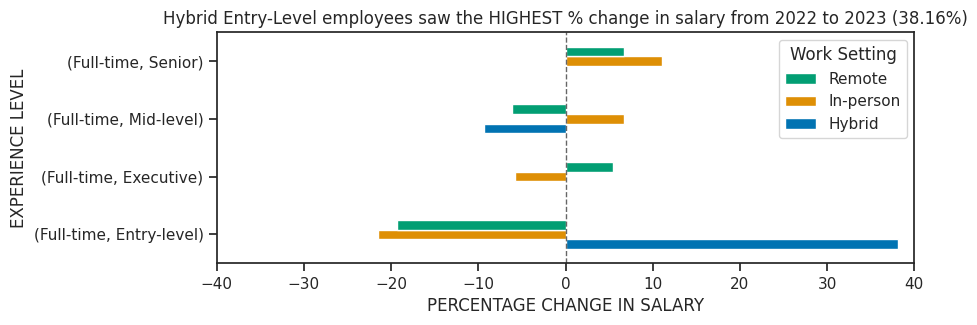

In [26]:
recent_data['%_change'].unstack().plot.barh(title=
    f'Hybrid Entry-Level employees saw the HIGHEST % change in salary from {str(last_year)} to {str(this_year)} ({round(recent_data["%_change"][0],2)}%)'
    , figsize=(9,3), xlim=(-40, 40)).axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.6)
plt.xlabel('PERCENTAGE CHANGE IN SALARY')
plt.ylabel('EXPERIENCE LEVEL')
plt.legend(title='Work Setting', reverse=True)
plt.show()

<a id="6"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">INTERACTIVE SUMMARY</p>

> Delve into the interactive graph showcasing salary details categorized by job title, providing an in-depth view of the roles associated with each job category

In [28]:
# Interactive full US data exploratory chart tool

# Define chart function
def update_chart(work_setting, selected_year, employment_type, experience_level):
    filtered_data = US_data[
        (US_data['work_setting'] == work_setting)
        & (US_data['year'] == selected_year)
        & (US_data['employment_type'] == employment_type)
        & (US_data['experience_level'] == experience_level)]
    grouped_filtered_data = filtered_data.groupby(['job_category', 'job_title'])['salary'].median().reset_index()

    fig = px.bar(grouped_filtered_data, y='job_title', x='salary', color='job_category', orientation='h',
                 title=(f"Median salary for {experience_level} {employment_type} employees in {selected_year} for {work_setting} data-jobs".upper()),
                 height=800, width=1000, template='simple_white')

    for i, (job_title, median_salary) in enumerate(zip(grouped_filtered_data['job_title'], grouped_filtered_data['salary'])):
        fig.add_annotation(
            go.layout.Annotation(x=median_salary,
                                 y=job_title, xref='x', yref='y'
                                 , text=f'{median_salary:,.0f}'
                                 , showarrow=True, arrowhead=3
                                 , ax=-70, ay=0,))
    fig.update_layout(
            legend=dict(traceorder="reversed",
            title_font_family="Ariel Bold",
            font=dict(family="Courier Bold",
                size=14, color="black"),
            bgcolor="white", bordercolor="gold",
            borderwidth=2,title="Job Category",
            itemdoubleclick='toggleothers'))
    fig.update_layout(yaxis_title='JOB TITLE'.upper(), xaxis_title='MEDIAN SALARY'.upper())
    fig.show()

# Dropdown for work_setting
work_setting_dropdown = widgets.Dropdown(
    options=US_data['work_setting'].unique()
    , value=US_data['work_setting'].unique()[1]
    , disabled=False, description='Work Setting:')

# Dropdown for year
year_dropdown = widgets.Dropdown(
    options=US_rec_counts.index
    , value=US_data['year'].unique()[0]
    , disabled=False, description='Year:')

# Dropdown for employment_type
employment_type_dropdown = widgets.Dropdown(
    options=US_data['employment_type'].unique()
    , value=US_data['employment_type'].unique()[0]
    , disabled=False, description='Employment Type:')

# Dropdown for experience_level
experience_level_dropdown = widgets.Dropdown(
    options=exp_order, value=exp_order[1]
    , disabled=False, description='Experience Level:')

# Add dropdowns and interactive chart
interactive_chart = interactive(update_chart, work_setting=work_setting_dropdown, selected_year=year_dropdown,
                                employment_type=employment_type_dropdown, experience_level=experience_level_dropdown)

interactive_chart

interactive(children=(Dropdown(description='Work Setting:', index=1, options=('In-person', 'Remote', 'Hybrid')…